<font size=5>Normalization and standardization

<Font size=5><font color="red">Z-score = x-mean/std

In [18]:
data = [1,23,5,656,7,89,36,8,3,7,8,2,41,12,56,33455]

In [19]:
outliers = []

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def outlier(data):
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3
    for i in data:
        z_score = (i-mean)/std
        if z_score>threshold:
            outliers.append(i)
    return outliers
    

In [22]:
a = outlier(data)

In [23]:
print(a)

[33455]


In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("titanic.csv",usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [25]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [26]:
df["Age"].fillna(df.Age.mean(),inplace=True)

In [27]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [32]:
for feature in df.columns:
    df[feature] = scaler.fit_transform(df[[feature]])

In [33]:
df.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.592481,-0.502445
1,1.266990,-1.566107,0.638789,0.786845
2,1.266990,0.827377,-0.284663,-0.488854
3,1.266990,-1.566107,0.407926,0.420730
4,-0.789272,0.827377,0.407926,-0.486337


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.74814709, -0.70702185, -0.66589661, -0.62477136,
        -0.58364612, -0.54252088, -0.50139564, -0.46027039, -0.41914515,
        -0.37801991, -0.33689467, -0.29576942, -0.25464418, -0.21351894,
        -0.17239369, -0.13126845, -0.09014321, -0.04901797, -0.00789272,
         0.03323252,  0.07435776,  0.115483  ,  0.15660825,  0.19773349,
         0.23885873,  0.27998398,  0.32110922,  0.36223446,  0.4033597 ,
         0.44448495,  0.48561019,  0.52673543,  0.56786068,  0.60898592,
         0.65011116,  0.6912364 ,  0.73236165,  0.77348689,  0.81461213,
         0.85573737,  0.89686262,  0.93798786,  0.9791131 ,  1.02023835,
 

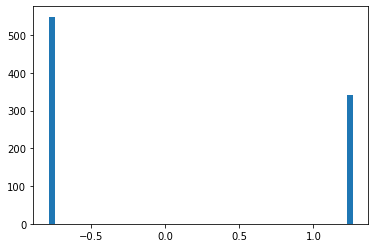

In [38]:
import matplotlib.pyplot as plt
plt.hist(df["Survived"],bins=50)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 184.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.51823724, -1.47036756, -1.42249788, -1.37462819,
        -1.32675851, -1.27888883, -1.23101914, -1.18314946, -1.13527978,
        -1.08741009, -1.03954041, -0.99167073, -0.94380104, -0.89593136,
        -0.84806167, -0.80019199, -0.75232231, -0.70445262, -0.65658294,
        -0.60871326, -0.56084357, -0.51297389, -0.46510421, -0.41723452,
        -0.36936484, -0.32149516, -0.27362547, -0.22575579, -0.17788611,
        -0.13001642, -0.08214674, -0.03427706,  0.01359263,  0.06146231,
         0.10933199,  0.15720168,  0.20507136,  0.25294104,  0.30081073,
         0.34868041,  0.39655009,  0.44441978,  0.49228946,  0.54015914,
 

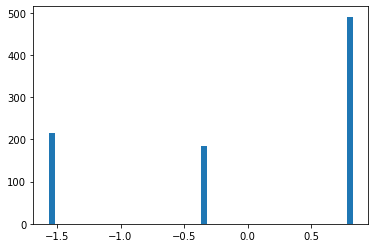

In [39]:
plt.hist(df["Pclass"],bins=50)

(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36.,  47., 204.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3.,   0.,   1.,   0.,   0.,   1.]),
 array([-2.25315549, -2.13067494, -2.0081944 , -1.88571385, -1.76323331,
        -1.64075277, -1.51827222, -1.39579168, -1.27331113, -1.15083059,
        -1.02835004, -0.9058695 , -0.78338895, -0.66090841, -0.53842786,
        -0.41594732, -0.29346677, -0.17098623, -0.04850569,  0.07397486,
         0.1964554 ,  0.31893595,  0.44141649,  0.56389704,  0.68637758,
         0.80885813,  0.93133867,  1.05381922,  1.17629976,  1.29878031,
         1.42126085,  1.5437414 ,  1.66622194,  1.78870248,  1.91118303,
         2.03366357,  2.15614412,  2.27862466,  2.40110521,  2.52358575,
         2.6460663 ,  2.76854684,  2.89102739,  3.01350793,  3.13598848,
 

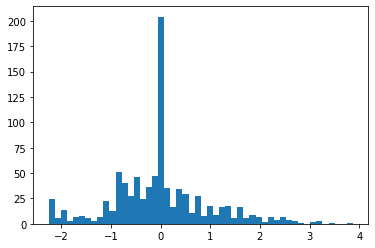

In [40]:
plt.hist(df["Age"],bins=50)

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.44210989, -0.23579813, -0.02948636,  0.1768254 ,
         0.38313716,  0.58944893,  0.79576069,  1.00207246,  1.20838422,
         1.41469598,  1.62100775,  1.82731951,  2.03363127,  2.23994304,
         2.4462548 ,  2.65256656,  2.85887833,  3.06519009,  3.27150185,
         3.47781362,  3.68412538,  3.89043715,  4.09674891,  4.30306067,
         4.50937244,  4.7156842 ,  4.92199596,  5.12830773,  5.33461949,
         5.54093125,  5.74724302,  5.95355478,  6.15986654,  6.36617831,
         6.57249007,  6.77880184,  6.9851136 ,  7.19142536,  7.39773713,
         7.60404889,  7.81036065,  8.01667242,  8.22298418,  8.42929594,
 

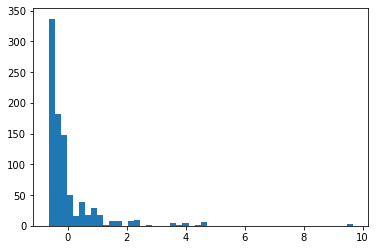

In [41]:
plt.hist(df["Fare"],bins=50)

<font size=6>minmaxscale = x - x.min/(x.max-x.min)

In [11]:
import pandas as pd
import numpy as np

In [12]:
df1 = pd.read_csv("titanic.csv",usecols=['Pclass','Survived','Fare','Age'])
df1.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [13]:
df1.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [14]:
df1["Age"].fillna(df1.Age.median(),inplace=True)

In [15]:
df1.isnull().sum( )

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
df2 = pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)

In [18]:
df2.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


In [19]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


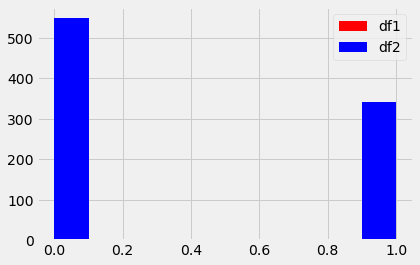

In [21]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.hist(df1["Survived"],color="red",label="df1")
plt.hist(df2["Survived"],color="blue",label="df2")
plt.legend()
plt.show()

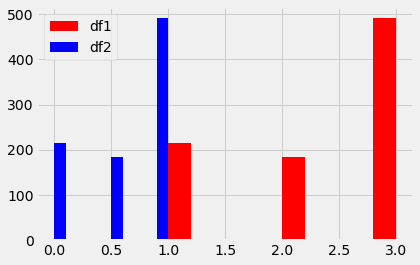

In [22]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.hist(df1["Pclass"],color="red",label="df1")
plt.hist(df2["Pclass"],color="blue",label="df2")
plt.legend()
plt.show()

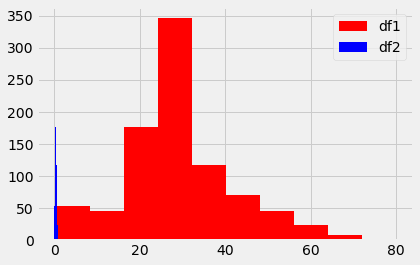

In [23]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.hist(df1["Age"],color="red",label="df1")
plt.hist(df2["Age"],color="blue",label="df2")
plt.legend()
plt.show()

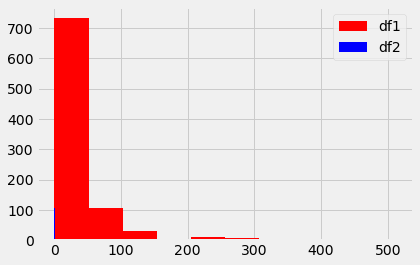

In [24]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.hist(df1["Fare"],color="red",label="df1")
plt.hist(df2["Fare"],color="blue",label="df2")
plt.legend()
plt.show()

<font size=5>Robust scaling

It is scaling using median and iqr

<font size=5> formula = (x-x.median)/iqr

iqr = 75% - 25%

In [25]:
import numpy as np
import pandas as pd

In [26]:
df3 = pd.read_csv('titanic.csv',usecols=['Pclass','Survived','Fare','Age'])
df3.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [27]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


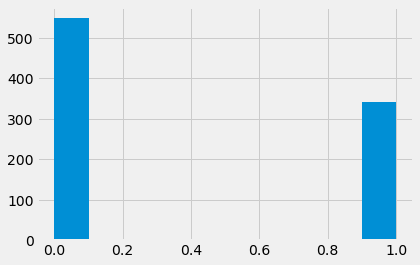

In [29]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.hist(df3['Survived'])
plt.show()

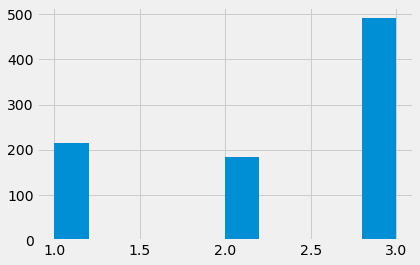

In [30]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.hist(df3['Pclass'])
plt.show()

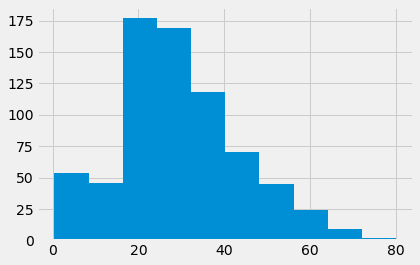

In [31]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.hist(df3['Age'])
plt.show()

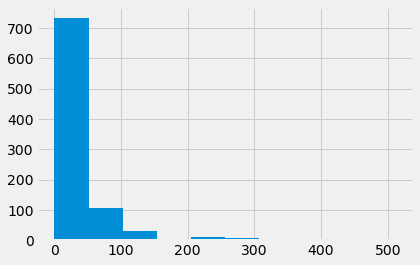

In [32]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.hist(df3['Fare'])
plt.show()

In [33]:
from sklearn.preprocessing import RobustScaler
scaling = RobustScaler()

In [34]:
df4 = pd.DataFrame(scaling.fit_transform(df3),columns=df3.columns)
df4.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363


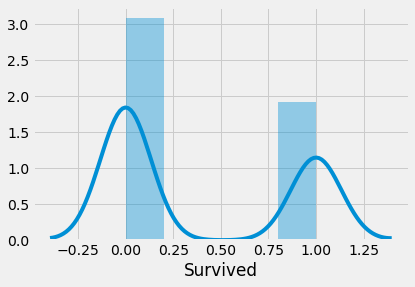

In [35]:
import seaborn as sn
sn.distplot(df4["Survived"])
plt.show()

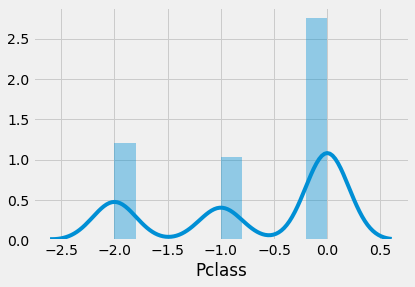

In [36]:
import seaborn as sn
sn.distplot(df4["Pclass"])
plt.show()

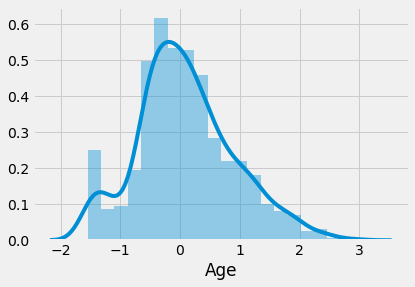

In [37]:
import seaborn as sn
sn.distplot(df4["Age"])
plt.show()

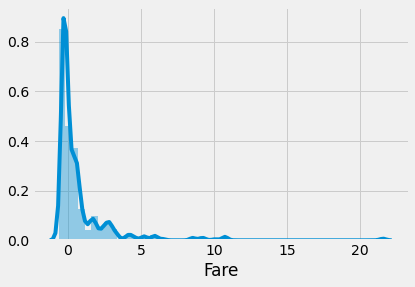

In [38]:
import seaborn as sn
sn.distplot(df4["Fare"])
plt.show()

<font size=5> Guassian distribution
1.log transformatin

In [1]:
import pandas as pd
import numpy as np

In [2]:
df5 = pd.read_csv('titanic.csv',usecols=['Pclass','Survived','Fare','Age'])
df5.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stat

In [6]:
def plotting(data,feature):
    plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.subplot(1,2,1)
    df5[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df5[feature],dist='norm',plot=pylab)
    plt.show()


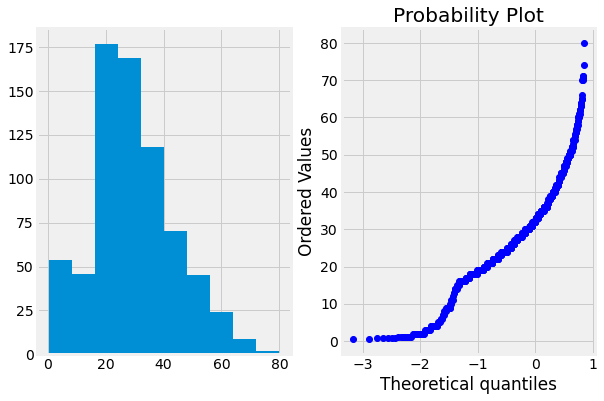

In [7]:
plotting(df5,'Age')

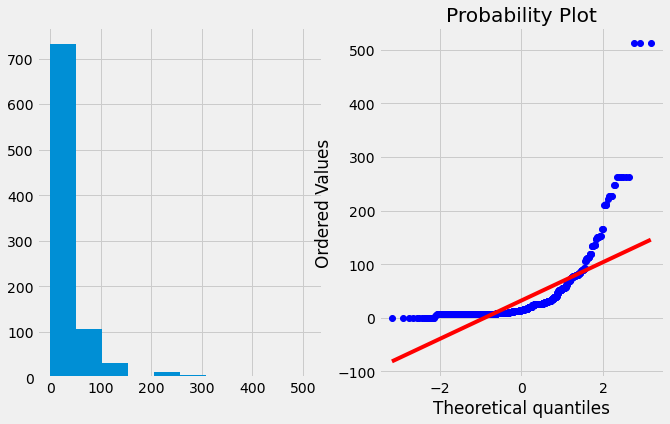

In [8]:
plotting(df5,'Fare')

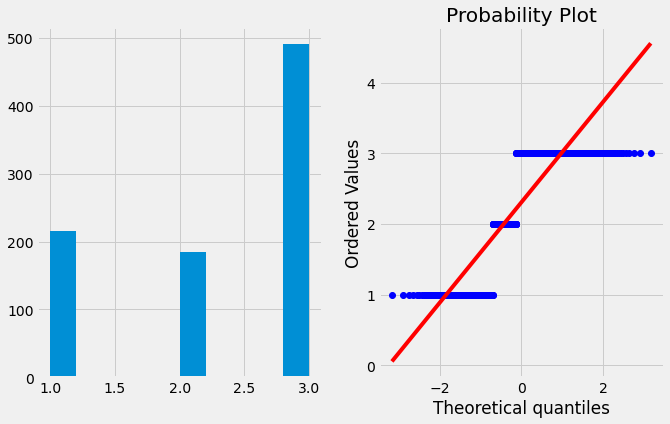

In [9]:
plotting(df5,'Pclass')

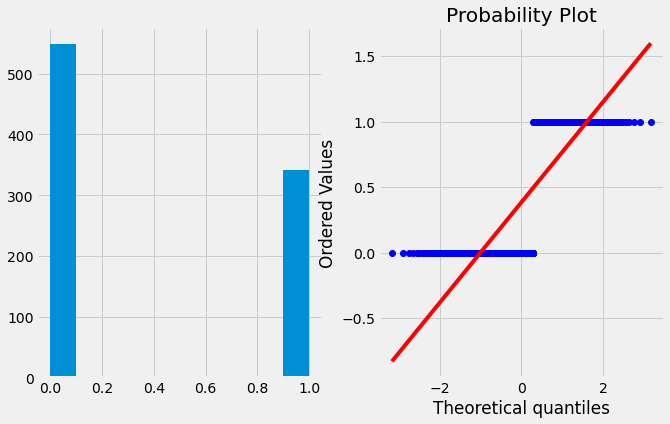

In [10]:
plotting(df5,'Survived')

In [11]:
df5["Age_log"] = np.log(df5["Age"])

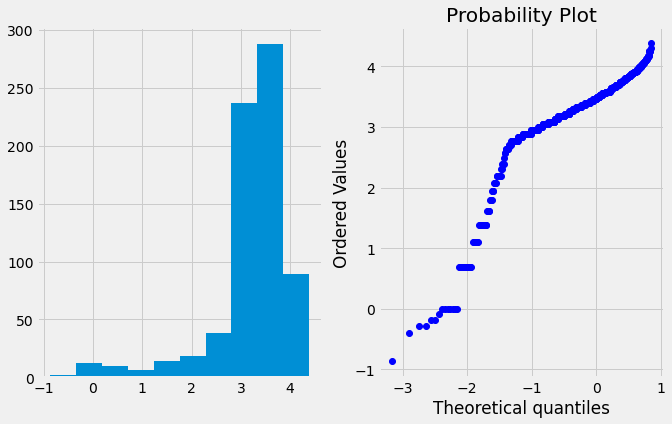

In [12]:
plotting(df5,'Age_log')

<font size=7>Recipropal Transformation

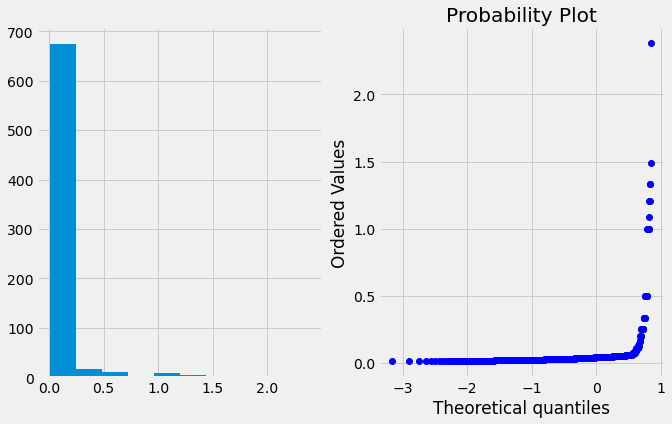

In [15]:
df5["Age_reci"] = 1/df5["Age"]
plotting(df5,'Age_reci')

<font size="5"> Square root transformation

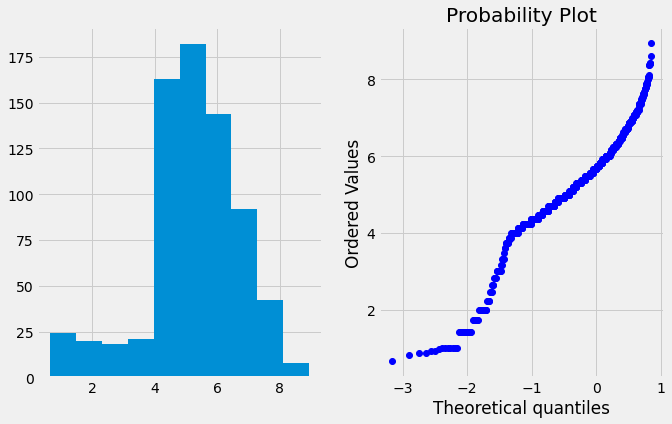

In [17]:
df5['square_age'] = df5["Age"]**(1/2)
plotting(df5,'square_age')

<font size=5>Exponential transformation

In [18]:
import math

In [20]:
df5['expo_age'] = df5["Age"] ** (1/1.2)

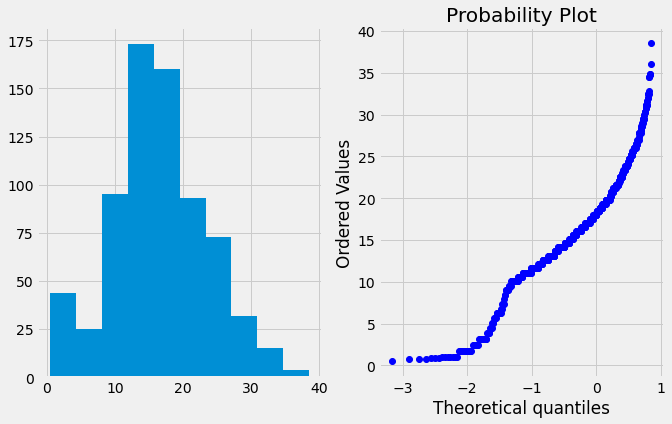

In [21]:
plotting(df5,'expo_age')